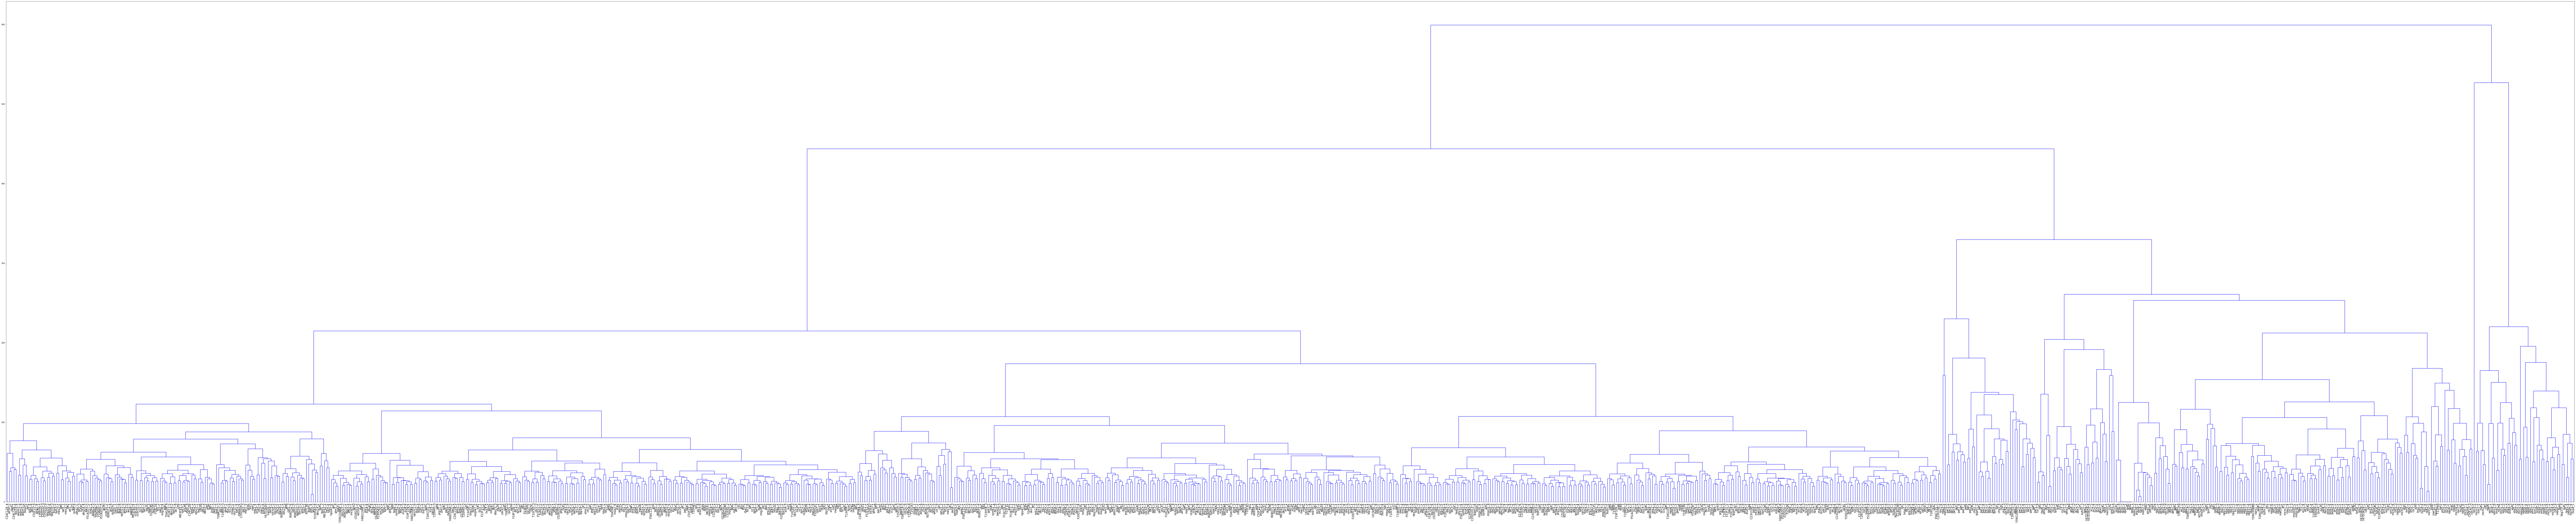

In [3]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(250,50))

data = np.genfromtxt('imputed_phenotype_expression_profiles_1141datasets.csv', names=True, usecols=tuple(range(1,1142)), dtype=float, delimiter=",")

#print len(data)
#print len(data.dtype.names)

data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

#print data_array

data_dist = pdist(data_array)
data_link = linkage(data_dist, method='ward', metric='euclidean')

#threshold = 0.1 * np.max(data_link[:,2])
threshold = 0.0

dendrogram(data_link, labels=data.dtype.names, leaf_font_size='15', color_threshold=threshold)
plt.show()

In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
microarray_cmap = LinearSegmentedColormap('microarray', {
    'red': [(0.0, 1.0, 1.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
    'green': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 1.0, 1.0)],
    'blue': [(0.0, 0.0, 0.0), (0.5, 0.2, 0.2), (1.0, 0.0, 0.0)],
})
#from scipy.spatial.distance import pdist 
#from scipy.cluster.hierarchy import linkage, dendrogram
#import matplotlib.pyplot as plt

def draw_heatmap(a, cmap=microarray_cmap):
    from matplotlib import pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from scipy.spatial.distance import pdist
    from scipy.cluster.hierarchy import linkage, dendrogram

    metric = 'euclidean'
    method = 'ward'

    main_axes = plt.gca()
    divider = make_axes_locatable(main_axes)
    xdendro_axes = divider.append_axes("top", 2.5, pad=0)
    ydendro_axes = divider.append_axes("left", 2.5, pad=0)

    plt.sca(xdendro_axes)
    xlinkage = linkage(pdist(a.T, metric=metric), method=method, metric=metric)
    xdendro = dendrogram(xlinkage, orientation='top', no_labels=True,
                         distance_sort='descending',
                        leaf_font_size='15',
                         link_color_func=lambda x: 'blue')
    plt.gca().set_axis_off()
    a = a[[a.columns[i] for i in xdendro['leaves']]]

    plt.sca(ydendro_axes)
    ylinkage = linkage(pdist(a, metric=metric), method=method,
                       metric=metric)
    ydendro = dendrogram(ylinkage, orientation='left', no_labels=True,
                         distance_sort='descending',
                         link_color_func=lambda x: 'blue')
    plt.gca().set_axis_off()
    a = a.loc[[a.index[i] for i in ydendro['leaves']]]

    plt.sca(main_axes)
    plt.imshow(a, aspect='auto', interpolation='none',
               cmap=cmap, vmin=-3.0, vmax=3.0)
#    plt.colorbar(pad=0.15)
    plt.gca().yaxis.tick_right()
    plt.xticks(range(a.shape[1]), a.columns, rotation=15, size='small')
    plt.yticks(range(a.shape[0]), a.index, size='x-small')
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.gca().invert_yaxis()
    plt.show()



plt.figure(figsize=(100,250))

data = np.genfromtxt('imputed_phenotype_expression_profiles_1141datasets.csv', names=True, usecols=tuple(range(1,1142)), dtype=float, delimiter=",")
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

#data_array = np.ma.masked_greater(data_array, 5.0)
#data_array = np.ma.masked_less(data_array, -5.0)

a = DataFrame(data_array, index=data.dtype.names)

draw_heatmap(a)